In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


%matplotlib inline
import os
#************************************************************************
os.chdir('D:/Sylvain/Projet-data') 

data = pd.read_csv(filepath_or_buffer = 'kidney_disease.csv' ,
sep = ';',  
index_col = "id")
data

In [15]:
# data.pcv=data.pcv.astype("float")

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   bgr     356 non-null    float64
 6   bu      381 non-null    float64
 7   sc      383 non-null    float64
 8   sod     313 non-null    float64
 9   pot     312 non-null    float64
 10  hemo    348 non-null    float64
 11  pcv     328 non-null    float64
 12  wc      292 non-null    float64
 13  ill     400 non-null    int64  
 14  rbc     248 non-null    object 
 15  pc      335 non-null    object 
 16  pcc     396 non-null    object 
 17  ba      396 non-null    object 
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [16]:
for cols in data:
    print(cols , len(data[cols].unique())) 


age 77
bp 11
sg 6
al 7
su 7
bgr 147
bu 119
sc 85
sod 35
pot 41
hemo 116
pcv 43
wc 90
ill 2
rbc 3
pc 3
pcc 3
ba 3
htn 3
dm 6
cad 4
appet 3
pe 3
ane 3


In [17]:
cat_data= data.select_dtypes(include = ['object'])
num_df = data.select_dtypes(include = ['int', 'float'])

In [18]:
cols=num_df.columns
for col in cols:
    num_df[cols] = num_df[cols].fillna(num_df[cols].mean())
    
print(num_df.isna().sum())

age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
ill     0
dtype: int64


In [19]:
for col2 in cat_data:
    print(f"{col2} : {cat_data[col2].unique()}\n")

rbc : [nan 'normal' 'abnormal']

pc : ['normal' 'abnormal' nan]

pcc : ['notpresent' 'present' nan]

ba : ['notpresent' 'present' nan]

htn : ['yes' 'no' nan]

dm : ['yes' 'no' ' yes' '\tno' '\tyes' nan]

cad : ['no' 'yes' '\tno' nan]

appet : ['good' 'poor' nan]

pe : ['no' 'yes' nan]

ane : ['no' 'yes' nan]



In [20]:
cat_data=cat_data.replace({'\tyes':'yes', '\tno':'no','yes':1,' yes':1,'no':-1,'normal':1,'abnormal':-1,'present':1,'notpresent':-1,'good':1,'poor':-1})
cat_data=cat_data.replace({'\tyes':'yes', '\tno':'no','yes':1,' yes':1,'no':-1,'normal':1,'abnormal':-1,'present':1,'notpresent':-1,'good':1,'poor':-1})
for col2 in cat_data:
    print(f"{col2} : {cat_data[col2].unique()}\n")

rbc : [nan  1. -1.]

pc : [ 1. -1. nan]

pcc : [-1.  1. nan]

ba : [-1.  1. nan]

htn : [ 1. -1. nan]

dm : [ 1. -1. nan]

cad : [-1.  1. nan]

appet : [ 1. -1. nan]

pe : [-1.  1. nan]

ane : [-1.  1. nan]



In [21]:
#Remplacer les valeurs manquantes des variables catégorielles par leur mode.
for i in cat_data.columns:
    cat_data[i].fillna(cat_data[i].mode()[0], inplace=True)
    
print((cat_data.isna().sum()))
for col2 in cat_data:
    print(f"{col2} : {cat_data[col2].unique()}\n")

rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64
rbc : [ 1. -1.]

pc : [ 1. -1.]

pcc : [-1.  1.]

ba : [-1.  1.]

htn : [ 1. -1.]

dm : [ 1. -1.]

cad : [-1.  1.]

appet : [ 1. -1.]

pe : [-1.  1.]

ane : [-1.  1.]



In [22]:
# on concat les num et les cat
11
data=pd.concat([num_df, cat_data], axis = 1) 
print((data.isna().sum()))


age      0
bp       0
sg       0
al       0
su       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
ill      0
rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64


In [23]:
y= data['ill']
data=data.drop('ill', axis=1)
print(y.value_counts(normalize=True))


1    0.625
0    0.375
Name: ill, dtype: float64


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # Création de l'instance StandardScaler
norm = scaler.fit_transform(data)
norm

array([[-0.20546364,  0.26233836,  0.48335471, ...,  0.50780078,
        -0.4843221 , -0.42008403],
       [-2.62380991, -1.96658024,  0.48335471, ...,  0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.62031314,  0.26233836, -1.38139079, ..., -1.96927621,
        -0.4843221 ,  2.38047614],
       ...,
       [-2.32888964,  0.26233836,  0.48335471, ...,  0.50780078,
        -0.4843221 , -0.42008403],
       [-2.03396936, -1.22360737,  1.41572747, ...,  0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.38437691,  0.26233836,  1.41572747, ...,  0.50780078,
        -0.4843221 , -0.42008403]])

Les valeurs propres sont : [6.61312927 1.83761832 1.6928457  1.28943894 1.21658204 1.04437187
 1.01251401 1.0039908  0.89284728 0.78775654 0.77183369 0.69585082
 0.64082945 0.58851997 0.50295333 0.43739767 0.39295462 0.36411175
 0.33724816 0.29658259 0.27766777 0.22269459 0.13790494]


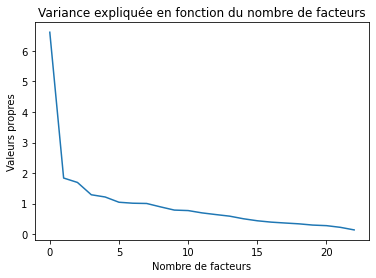

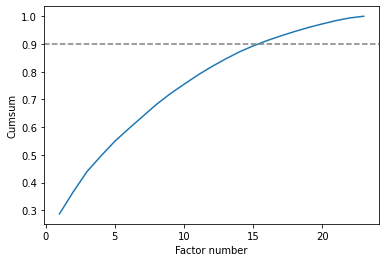

Les 15 premières composantes semblent etre optimales pour ateindre 90% de variance


Bonus : Autre présentation graphique possible :


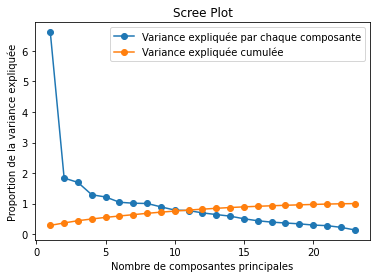

In [25]:
# Créer une instance de la classe PCA nommée model.
# Stocker la représentation de data obtenue par Analyse en Composantes Principales dans un array nommé coord_acp.
%matplotlib inline

from sklearn.decomposition import PCA
model = PCA()
coord_acp = model.fit_transform(norm)

# Afficher la part de variance expliquée pour chaque composante de l'Analyse en Composantes Principales
print('Les valeurs propres sont :', model.explained_variance_)
# Tracer le graphe de la variance expliquée en fonction du nombre de facteurs.
plt.plot(range(0, 23), model.explained_variance_)
plt.title('Variance expliquée en fonction du nombre de facteurs')
plt.xlabel('Nombre de facteurs')
plt.ylabel('Valeurs propres');
plt.show()
# Quelle nombre de composantes semble être optimale pour une compression des données par ACP ?
cumul_var=np.cumsum(model.explained_variance_ratio_)
plt.plot(np.arange(1, 24), cumul_var)
plt.xlabel('Factor number')
plt.ylabel('Cumsum')
plt.axhline(y=0.9,color='gray',linestyle='--');
plt.show()

print("Les", np.argmax(cumul_var>0.90),"premières composantes semblent etre optimales pour ateindre 90% de variance\n\n")

# Autre présentation possible : Créer un scree plot avec la variance expliquée cumulée
print("Bonus : Autre présentation graphique possible :")
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(model.explained_variance_) + 1), model.explained_variance_, 'o-', label='Variance expliquée par chaque composante')
plt.plot(range(1, len(model.explained_variance_) + 1), cumul_var, 'o-', label='Variance expliquée cumulée')
plt.title('Scree Plot')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de la variance expliquée')
plt.legend()
plt.show()


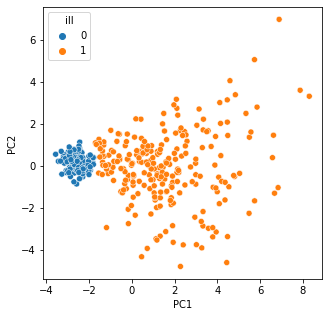

In [26]:
# Créer un nouveau DataFrame nommé acp_data contenant la représentation des données sur 
# les deux premières composantes de l'ACP ainsi que la variable cible
acp_data = pd.DataFrame({'PC1': coord_acp[:, 0], 'PC2': coord_acp[:, 1],'Target':y})
# Afficher un nuage de points entre ces deux axes, colorés en fonction de la variable y.
plt.figure(figsize=(5, 5))
sns.scatterplot(x='PC1', y='PC2', data=acp_data, hue=y);


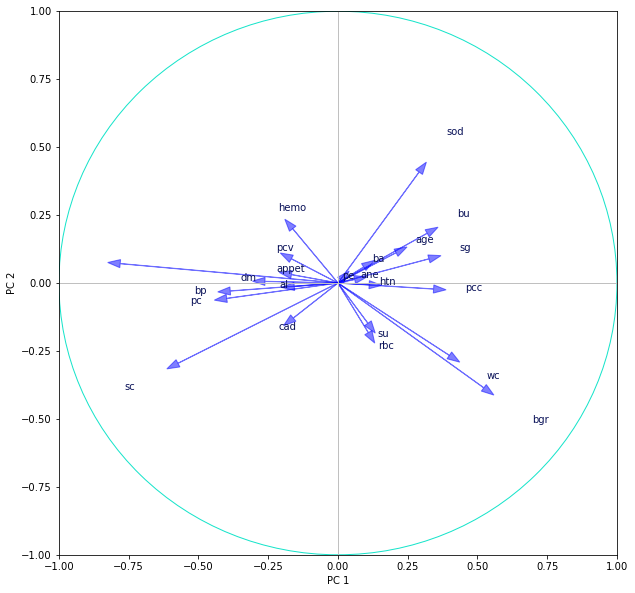

la variable est la plus corrélée positivement au premier axe est : (0.008323716264727214, 'htn')
la variable est la plus corrélée négativement au premier axe est : (0.007864167379259006, 'dm')
la variable est la plus corrélée positivement au second axe est : (0.013302962131459414, 'pe')
la variable est la plus corrélée négativement au second axe est : (0.14310706053224867, 'su')
 
Plus une variable possède une qualité de représentation élevée dans l’ACP, plus sa flèche est longue
Plus deux variables sont corrélées, plus leurs flèches pointent dans la même direction
Plus une variable est proche d’un axe principal de l’ACP, plus elle est liée à lui


In [27]:
size = len(data.columns)
racine_valeurs_propres = np.sqrt(model.explained_variance_)
corvar = np.zeros((size,size))
for k in range(size):
    corvar[:,k] = model.components_[:,k] * racine_valeurs_propres[k]

#Délimitation de la figure
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#Affichage des variables
for j in range(size):
    plt.annotate(data.columns[j],(corvar[j,0]*0.8,corvar[j,1]*0.8),color='#091158')
    plt.arrow(0,0,corvar[j,0]*0.6,corvar[j,1]*0.6, alpha=0.5, head_width=0.03,color='b' )
#Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#Cercle et légendes
cercle = plt.Circle((0,0),1,color='#16E4CA',fill=False)
axes.add_artist(cercle)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()
gg=99
for j in range(size):
#     print((corvar[j,0]*0.8,corvar[j,1]*0.8),data.columns[j])
    if abs(corvar[j,1]*0.8)<gg and corvar[j,0]*0.8>0:
        gg=abs(corvar[j,1]*0.8)
        PC1_pos=gg,data.columns[j]
    
    elif abs(corvar[j,1]*0.8)<gg and corvar[j,0]*0.8<0:
        gg=abs(corvar[j,1]*0.8)
        PC1_neg=gg,data.columns[j]   
gg=99
for j in range(size):
    if abs(corvar[j,0]*0.8)<gg and corvar[j,1]*0.8>0:
        gg=abs(corvar[j,0]*0.8)
        PC2_pos=gg,data.columns[j]

    elif abs(corvar[j,0]*0.8)<gg and corvar[j,1]*0.8<0:
        gg=abs(corvar[j,0]*0.8)
        PC2_neg=gg,data.columns[j]       
# Quelle variable est la plus corrélée positivement au premier axe ?
print("la variable est la plus corrélée positivement au premier axe est :", PC1_pos)
# Quelle variable est la plus corrélée négativement au premier axe ?
print("la variable est la plus corrélée négativement au premier axe est :", PC1_neg)
# Quelle variable est la plus corrélée positivement au deuxième axe ?
print("la variable est la plus corrélée positivement au second axe est :",PC2_pos)
# Quelle variable est la plus corrélée négativement au deuxième axe ?
print("la variable est la plus corrélée négativement au second axe est :",PC2_neg)
print(" ")
# Quelle conclusion pouvez-vous en tirer ?
print("Plus une variable possède une qualité de représentation élevée dans l’ACP, plus sa flèche est longue")
print("Plus deux variables sont corrélées, plus leurs flèches pointent dans la même direction")
print("Plus une variable est proche d’un axe principal de l’ACP, plus elle est corrélée à lui")


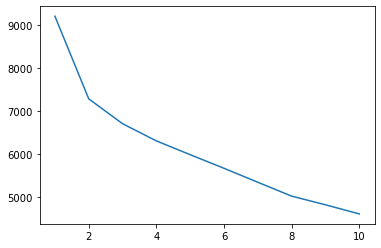

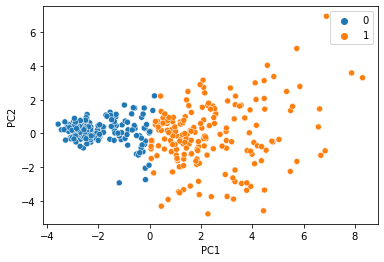

0    213
1    187
Name: Target, dtype: int64


In [28]:
#Créer une instance de la classe KMeans avec le nombre de clusters qui vous semble juste

from sklearn.cluster import KMeans
# Pour éviter d'avoir les messages warning
import warnings
warnings.filterwarnings('ignore')

tab=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(norm)
    tab.append(kmeans.inertia_)
    

plt.title=("La méthode du coude (elbow)")
plt.xlabel=("Nb de clusters")
plt.plot(range(1,11),tab)
plt.show()

# je choisis 2 clusters
kmeans=KMeans(n_clusters=2)
#Ajuster le modèle au données coord_acp
kmeans.fit(coord_acp)
# Récupérer les predictions réalisées par l'algorithme.
# Stocker dans un nouveau DataFrame les coordonnées de chaque point sur les 2 premières composantes principales ainsi que la prédiction associée
kmean_pred=kmeans.predict(coord_acp)
kmean_data= pd.DataFrame({'PC1': coord_acp[:, 0], 'PC2': coord_acp[:, 1],'Target':kmean_pred})
sns.scatterplot(x='PC1', y='PC2', data=kmean_data, hue=kmean_pred);
plt.show()
# Afficher le nombre de patients appartenant à chacun des groupes obtenus par le K-Means.
print(kmean_data['Target'].value_counts())

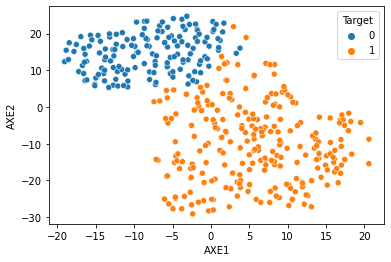

In [65]:
#Créer une instance de la classe TSNE

from sklearn.manifold import TSNE
Coord_TSNE=[]
tsne = TSNE(n_components=2, random_state=0)
# Appliquer la T-SNE aux données norm.
Coord_TSNE=pd.DataFrame(tsne.fit_transform(norm),columns=['AXE1','AXE2'])

# # Stocker dans un nouveau DataFrame nommé coord_TSNE les 2 premières coordonnées de chaque point obtenues par TSNE ainsi que la variable cible.
data_TSNE=Coord_TSNE.copy()
data_TSNE.insert(2,'Target',y)
# # Afficher dans un nuage de points chaque individu coloré en fonction de la variable cible.
sns.scatterplot(x='AXE1', y='AXE2', data=data_TSNE, hue='Target');
plt.show()


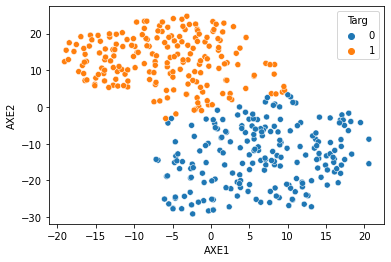

0    204
1    196
Name: Targ, dtype: int64


In [78]:

# Créer une instance de la classe KMeans avec le nombre de clusters qui vous semble juste.
# je choisis 2 clusters
from sklearn.cluster import KMeans
# Pour éviter d'avoir les messages warning
import warnings
warnings.filterwarnings('ignore')
# Ajuster le modèle au données coord_TSNE
kmeans=KMeans(n_clusters=2)
#Ajuster le modèle au données coord_acp
kmeans.fit(Coord_TSNE)
# Récupérer les predictions réalisées par l'algorithme.
# Stocker dans un nouveau DataFrame les coordonnées de chaque point sur les 2 premières composantes principales ainsi que la prédiction associée
kmean_pred_TSNE=kmeans.predict(Coord_TSNE)
Coord_TSNE
kmean_data_TSNE= Coord_TSNE.copy()
kmean_data_TSNE.insert(2,'Targ',kmean_pred_TSNE)
sns.scatterplot(x='AXE1', y='AXE2', data=kmean_data_TSNE, hue='Targ');
plt.show()
# Afficher le nombre de personnes malades et non malades obtenu par le K-Means
print(kmean_data_TSNE['Targ'].value_counts())

In [92]:
# # Que pouvez-vous en conclure ?
print("le modele Kmean sur ACP predit moins de malades (187) que le modèle Kmean sur TSNE (196)" )
print ("Le nombre relle de malades est de", data['ill'].value_counts()[1])
print("la méthode TSNE + KMEAN semble meilleure pour cette expérience")
print("dans les 2 cas la réduction de données a degradé le dataset l'utilisation de seulement 2 composantes est top faible")

le modele Kmean sur ACP predit moins de malades (187) que le modèle Kmean sur TSNE (196)
Le nombre relle de malades est de 250
la méthode TSNE + KMEAN semble meilleure pour cette expérience
